# 🎲 Logistic Regression

**Logistic regression** is a process of modeling the probability of a discrete outcome given an input variable.

Logistic Regression was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical. 

For example : 
- To predict whether an email is spam (1) or (0)
- Whether the tumor is malignant (1) or not (0)

<center><img src="https://blog.developerspoint.org/assets/img/logistic_banner.jpg" width=900></center>


<ipython-input-3-37fd3671bbe2>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


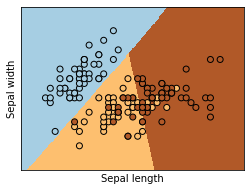

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('bmh')

In [6]:
df_students = pd.read_csv('data/students.csv')

In [7]:
df_students.head()

mark1   mark2  admitted
0   6.9247  15.605         0
1   6.0573   8.779         0
2   7.1695  14.580         0
3  12.0370  17.262         1
4  15.8070  15.069         1

# 🦮 Data Exploration

In this dataset, the features represent the marks obtained by students on two subjects, and the target is the student being admitted to a major.

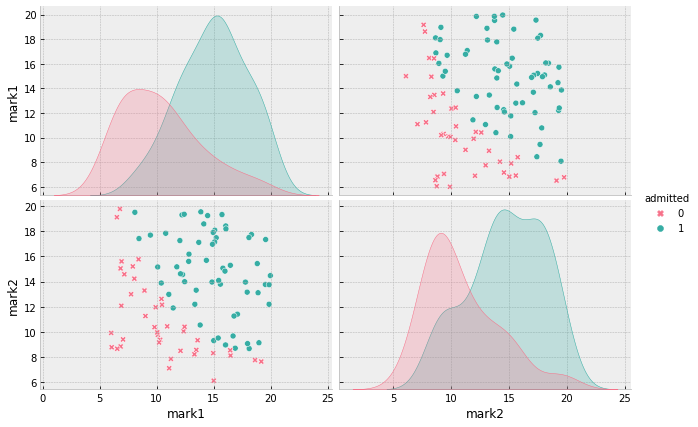

In [8]:
sns.pairplot(df_students, hue='admitted', height=3,aspect=1.5, palette="husl",markers=["X", "o"])

In [9]:
df_students['admitted'].value_counts()

1    60
0    40
Name: admitted, dtype: int64

<AxesSubplot:xlabel='admitted', ylabel='count'>

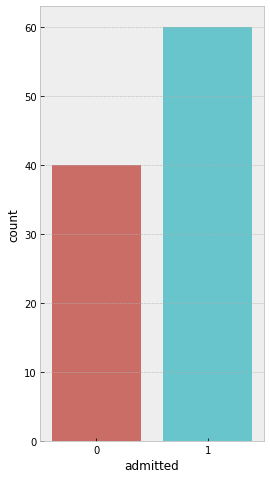

In [17]:
plt.figure(figsize=(4,8))
sns.countplot(x='admitted',data=df_students,palette='hls')

# 🔨 Model Building

In [18]:
features = ['mark1', 'mark2']
target = 'admitted'

In [41]:
X = df_students[features].values
y = df_students[target].values.astype(np.int32)
X.shape,y.shape

((100, 2), (100,))

In [20]:
X[:5],y[:5]

(array([[ 6.9247, 15.605 ],
        [ 6.0573,  8.779 ],
        [ 7.1695, 14.58  ],
        [12.037 , 17.262 ],
        [15.807 , 15.069 ]]),
 array([0, 0, 0, 1, 1]))

Let's reuse the functions we made on the previous notebook.

In [22]:
def add_theta_0(X):
  intercept = np.ones(len(X))
  X_stacked = np.vstack((intercept, X.T)).T
  return X_stacked

In [31]:
def initialize_theta(n_features,is_random=True):
  """
  Returns bias (intercept) and weight for a vector X of n features in the form of a ndarray [theta_0,theta_1,..., theta_n].
  theta_0 being the bias, and the others the weights.
  n has to be greater or equal to 1.
  
  Parameters:
  n_features: number of features of X. If errors occur, reshape(-1,1) your vector.
  is_random: if set to False, will set values of bias and theta to zero.
  """
  if is_random:
    return np.random.rand(n_features,1) 
  else:
    return np.zeros(shape=(n_features,1))

In [25]:
def h_theta(X,theta):
  """
  This is the predict(X) function that returns y_hat.
  """
  return X.dot(theta)

In [32]:
def get_cost(X,y,theta):   #NEEDS TO BE CHANGED
           
    # initialize J (the cost)
    J = 0 

    # Calculate h = X * theta 
    h = h_theta(X,theta)
    
    # Calculate the Cost J
    J = mean_squared_error(y.reshape(-1,1),h)
    
    return J

In [33]:
def mean_squared_error(y,h_theta):
  loss = h_theta - y
  m = len(y) 
  return 1/(2*m) * np.sum(loss ** 2)

In [38]:
import time
def gradient_descent(X, y, theta, num_iters=100, alpha=0.0001,verbose=False):
  """
  Parameters:
  X : training samples
  y : training labels
  num_iters : epoches of the algorithm to reach convergence
  alpha: step of the partial derivatives
  verbose : if set to True, will log the values of the cost and theta values.
  
  Returns theta updated values, cost_history and theta history.
  """
  start = time.time()
  # Number of training examples
  m = len(y)
  y_true = np.copy(y).reshape(-1,1)
                     
  # History of costs
  result_idx = 0
  gd_iterations_df = pd.DataFrame(columns=['iteration','cost']) 
  J_history = [] 
  theta_history = []
  parameters_out = {}
  
  # Append the initial cost
  gd_iterations_df.loc[result_idx]=[0,get_cost(X,y,theta)]
  result_idx += 1
  
  for i in range(1,num_iters+1):
      # Step 1 : Calculate h = X * theta
      h = h_theta(X,theta)
      
      # Step 2 :Calculate the error = (h - y) 
      error = np.subtract(h, y_true)
      
      # Step 3 : Calculate the new theta
      theta_new = alpha * 1/m * np.sum(np.multiply(X, error),axis=0).reshape(-1,1)

      # Step 4 : Update theta
      theta = np.subtract(theta, theta_new)

      # Step 5 : Compute the cost to keep history of it
      cost = get_cost(X,y_true,theta)
      
      gd_iterations_df.loc[result_idx]=[i,cost]
      result_idx += 1
      
      J_history.append(cost)
      theta_history.append(theta.tolist())
      
      if verbose:
          print('{}/{} [>==================]  - loss: {:.2f} - theta = {}'.format(i+1,num_iters,cost,theta))
          
  print('Time spent: {:0.2f}s'.format(time.time()-start))
  parameters_out["weight"] = theta[0][0]
  parameters_out["bias"] = theta[1:]
  return parameters_out,theta, theta_history, J_history,gd_iterations_df 

In [39]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

assert sigmoid(0) == 0.5

## Descente du Gradient : Appel des fonctions

In [42]:
X = add_theta_0(X)
X[:5]

array([[ 1.    ,  6.9247, 15.605 ],
       [ 1.    ,  6.0573,  8.779 ],
       [ 1.    ,  7.1695, 14.58  ],
       [ 1.    , 12.037 , 17.262 ],
       [ 1.    , 15.807 , 15.069 ]])

Initialisation de $\theta_0$ et $\theta_1$

Let's try with two samples.

In [51]:
theta = initialize_theta(X.shape[1],is_random=False)
theta

array([[0.],
       [0.],
       [0.]])

In [52]:
# paramètres
iterations = 4000
my_alpha = 0.00001

In [53]:
initial_cost = get_cost(X,y,theta)
print('initial cost: ',initial_cost)

initial cost:  0.3


In [54]:
# Appel
parameters_out,theta, theta_history, J_history,gd_iterations_df = gradient_descent(X, y, theta, num_iters=iterations, alpha=my_alpha)

Time spent: 3.13s


In [55]:
theta

array([[-0.00021317],
       [ 0.02666061],
       [ 0.02266976]])

In [56]:
parameters_out

{'weight': -0.0002131679076726252,
 'bias': array([[0.02666061],
        [0.02266976]])}

In [57]:
gd_iterations_df

iteration      cost
0           0.0  0.300000
1           1.0  0.298408
2           2.0  0.296827
3           3.0  0.295258
4           4.0  0.293700
...         ...       ...
3996     3996.0  0.079818
3997     3997.0  0.079818
3998     3998.0  0.079818
3999     3999.0  0.079818
4000     4000.0  0.079818

[4001 rows x 2 columns]

Traçage de la fonction du coût

Text(0, 0.5, 'Cost (J)')

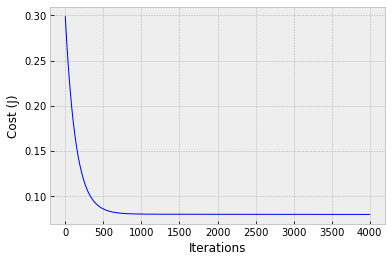

In [58]:
# Plot the J history
plt.plot(J_history[0:len(J_history)], color='blue', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

## Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [30]:
def drawLine():
  pass
    

# Affichage 
Graphe representant les acceptations selon les caracteristiques

In [64]:
admitted = X[np.where(y==1)]
rejected = X[np.where(y==0)]

In [68]:
y_hat = sigmoid(h_theta(X,theta))

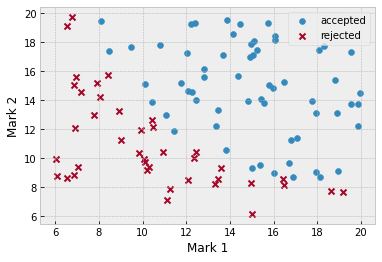

In [66]:
plt.scatter(admitted[:,1],admitted[:,2], label="accepted",marker ='o')
plt.scatter(rejected[:,1],rejected[:,2], label="rejected",marker ='x')
plt.xlabel('Mark 1')
plt.ylabel('Mark 2')
plt.legend()

Traçage du coût en fonction de theta0 et theta1

Prédire des valeurs de y

In [73]:
def predict(X,theta):
  if X.shape[0] != theta.shape[0]:
    X = add_theta_0(X)
  return sigmoid(X.dot(theta))

In [78]:
# Predire pour des notes note1= 9 et note2=17
student1 = np.array([[9,17]])

In [80]:
predict1 = predict(student1,theta)
predict1*100

array([[65.13817191]])

# 🔬 Comparison with scikit-learn
Comparer vos algorithmes à ceux de scikitlearn

# 🗑 Sheets
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
h_test = X.dot(theta)
h_test[:6]


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
y = y.reshape(-1,1)

In [ ]:
error = h_test - y
error[:6]

array([[ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [-1.],
       [ 0.]])

In [ ]:
alpha = 0.0001
m = len(y)

In [ ]:
theta_new = alpha * 1/m * np.sum(np.multiply(X, error),axis=0).reshape(-1,1)
theta - theta_new

array([[6.000000e-05],
       [8.966297e-04],
       [8.874788e-04]])

# 📚 Ressources and References

1. *A logistic regression from scratch*,https://towardsdatascience.com/a-logistic-regression-from-scratch-3824468b1f88
2. *Logistic Regression Machine Learning Algorithm in Python from Scratch*,https://dhirajkumarblog.medium.com/logistic-regression-in-python-from-scratch-5b901d72d68e
3. *Building A Logistic Regression in Python, Step by Step*, https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8